<a href="https://colab.research.google.com/github/BrunoBoscolo/Natural-Language-Processing/blob/main/Processamento_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalação de dependências**

In [2]:
!pip install nltk==3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434680 sha256=b5141f6f68737fe14ddaaab49e4847800f0679bf3368e823574e081a279b160a
  Stored in directory: /root/.cache/pip/wheels/35/ab/82/f9667f6f884d272670a15382599a9c753a1dfdc83f7412e37d
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [3]:
!pip install numpy matplotlib

In [24]:
import matplotlib

**Tokenização da linguagem e filtragem inicial**

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize #Tokenização por palavra e tokenização por sentença
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words("english")) #Palavras em inglês a serem ignoradas

worf_quote = "Sir, I protest. I am not a merry man!" #Frase a ser utilizada como exemplo
words_in_quote = word_tokenize(worf_quote) #Tokenização por palavra

filtered_list = [
    word for word in words_in_quote if word.casefold() not in stop_words #Itera entre as palavras e filtra as 'stop-words'
]

print(filtered_list)

['Sir', ',', 'protest', '.', 'merry', 'man', '!']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Afunelamento**

In [14]:
from nltk.stem import PorterStemmer #Converte as palavras para seu radical, "Ajudar = ajuda", "Helping = Help"
from nltk.tokenize import word_tokenize

nltk.download('punkt')

stemmer = PorterStemmer()

string_for_stemming = """
The crew of the USS Discovery discovered many discoveries.
Discovering is what explorers do."""

words = word_tokenize(string_for_stemming)

stemmed_words = [stemmer.stem(word) for word in words]
print(stemmed_words)

['the', 'crew', 'of', 'the', 'uss', 'discoveri', 'discov', 'mani', 'discoveri', '.', 'discov', 'is', 'what', 'explor', 'do', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Classificação das palavras**


In [16]:
from nltk.tokenize import word_tokenize
import nltk

sagan_quote = """
If you wish to make an apple pie from scratch,
you must first invent the universe."""

words_in_sagan_quote = word_tokenize(sagan_quote)

words_classified = nltk.pos_tag(words_in_sagan_quote) #Classifica as palavras em suas respectivas categorias sintáticas

print(words_classified)

[('If', 'IN'), ('you', 'PRP'), ('wish', 'VBP'), ('to', 'TO'), ('make', 'VB'), ('an', 'DT'), ('apple', 'NN'), ('pie', 'NN'), ('from', 'IN'), ('scratch', 'NN'), (',', ','), ('you', 'PRP'), ('must', 'MD'), ('first', 'VB'), ('invent', 'VB'), ('the', 'DT'), ('universe', 'NN'), ('.', '.')]


**Lematização**

In [17]:
from nltk.stem import WordNetLemmatizer #Método semelhante para obter o radical de palavras

lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize("scarves")

string_for_lemmatizing = "The friends of DeSoto love scarves."

words = word_tokenize(string_for_lemmatizing)

lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print(lemmatized_words)

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']


**Chunking**

In [21]:
from nltk.tokenize import word_tokenize # Tokenização detecta palavras, Chunking detecta frases, baseando-se na estrutura gramatical do inglês

lotr_quote = "It's a dangerous business, Frodo, going out your door."

words_in_lotr_quote = word_tokenize(lotr_quote)

nltk.download("averaged_perceptron_tagger")
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)

grammar = "NP: {<DT>?<JJ>*<NN>}"

chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(lotr_pos_tags)
#tree.draw()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Chinking**

In [ ]:
grammar = """
Chunk: {<.*>+}
       }<JJ>{""" #Chinking Exclui padrões sintáticos

chunk_parser = nltk.RegexpParser(grammar)

tree = chunk_parser.parse(lotr_pos_tags)

#tree.draw()

**Named Entity Recognition**

In [26]:
nltk.download("maxent_ne_chunker")
nltk.download("words")
tree = nltk.ne_chunk(lotr_pos_tags)
#tree.draw()
print(tree)
#or

tree = nltk.ne_chunk(lotr_pos_tags, binary=True)
#tree.draw()

#ex...

quote = """
Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
for countless centuries Mars has been the star of war—but failed to
interpret the fluctuating appearances of the markings they mapped so well.
All that time the Martians must have been getting ready.

During the opposition of 1894 a great light was seen on the illuminated
part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
and then by other observers. English readers heard of it first in the
issue of Nature dated August 2."""

def extract_ne(quote): #Extrai todas as entidades entituladas, excluindo repetição
    words = word_tokenize(quote, language=language)
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(
        " ".join(i[0] for i in t)
        for t in tree
        if hasattr(t, "label") and t.label() == "NE"
    )

(S
  It/PRP
  's/VBZ
  a/DT
  dangerous/JJ
  business/NN
  ,/,
  (PERSON Frodo/NNP)
  ,/,
  going/VBG
  out/RP
  your/PRP$
  door/NN
  ./.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


**Concordância**

In [ ]:
nltk.download("book")
from nltk.book import *

text8.concordance("man")

 #Output
'''Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet times . Seeks 35 - 45 , honest man with good SOH & similar interests , f
 genuine , caring , honest and normal man for fship , poss rship . S / S , S /'''

text8.dispersion_plot(
    ["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"]
)

**Distribuição de frequência**

<FreqDist with 1108 samples and 4867 outcomes>


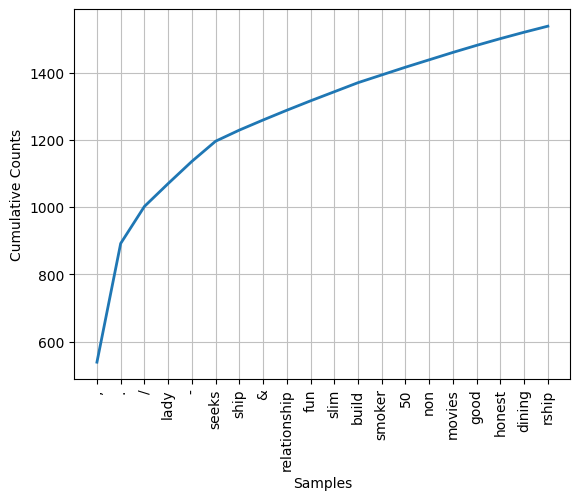

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [35]:
frequency_distribution = FreqDist(text8)
print(frequency_distribution)

frequency_distribution.most_common(20)

meaningful_words = [
    word for word in text8 if word.casefold() not in stop_words
]

frequency_distribution = FreqDist(meaningful_words)

frequency_distribution.most_common(20)

frequency_distribution.plot(20, cumulative=True)

**Encontrando colocações sintáticas**

In [43]:
print(text8.collocations())

lemmatized_words = [lemmatizer.lemmatize(word) for word in text8]
new_text = nltk.Text(lemmatized_words)
new_text.collocations()

print(new_text)

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build
None
medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; weekend away; well presented; never
married; single mum; permanent relationship; year old; slim build
<Text: 25 SEXY MALE , seek attrac older single...>
